# Violin plots for overall recall, centrality effects, temporal violation rate

0. define functions for the violin plot
1. adventure: overall recall comparison across 3 conditions
2. romance: overall recall comparison across 3 conditions
3. adventure: semantic/causal centrality effect on memory comparison across 3 conditions
4. romance: semantic/causal centrality effect on memory comparison across 3 conditions
5. adventure: temporal violation rate comparison across 3 conditions
6. romance: temporal violation rate comparison across 3 conditions

In [8]:
# 0. define functions for the violin plot

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
    
def plot_figsize(wd,ht):
    plt.figure(figsize=(wd, ht))
    
def plot_swarm(data,y,x,ytitle,outpath=False,fig_format='.png',hue=False,size=7,alpha=1,edgecolor='black',dodge=False,add=False):
    df = data
    if hue==False:
        ax = sns.swarmplot(x=x, y=y, data=df, color='black', size=size,alpha=alpha, edgecolor=edgecolor,dodge=dodge)
    else:
        ax = sns.swarmplot(x=x, y=y, data=df, hue=hue,size=size,alpha=alpha, edgecolor=edgecolor,dodge=dodge)
    ax.set_xlabel(None)
    ax.set_ylabel(ytitle,fontsize=44)
    ax.tick_params(axis='both', labelsize=32)
    plt.tight_layout()
    if outpath!=False:
        if outpath[-1]!='/':
            outname = outpath+fig_format
        elif '.' in outpath.split('/')[-1]:
            outname = outpath
        else:
            outname = outpath+fig_format        
        plt.savefig(outname)
        print('figure saved.')

def plot_violin(data,y,x,outpath=False,fig_format='.png',color=False,split=False,cut=3,linewidth=None,inner='box',swarm=False,bandwidth=False,palet='muted',alpha=1,add=False):
    #sns.set_theme(style="whitegrid")
    df = data
    if bandwidth ==False:
        bdwd = .5
    else: 
        bdwd = bandwidth
    if color!=False:
        ax = sns.violinplot(x=x, y=y, hue=color, data=df, cut=cut,linewidth=linewidth,palette=palet,inner=inner,split=split, bw=bdwd,alpha=alpha)
    else:
        ax = sns.violinplot(x=x, y=y, data=df, cut=cut,linewidth=linewidth,palette=palet,split=split,inner=inner, bw=bdwd, alpha=alpha) 
    plt.tight_layout()
   

figure saved.
figure saved.


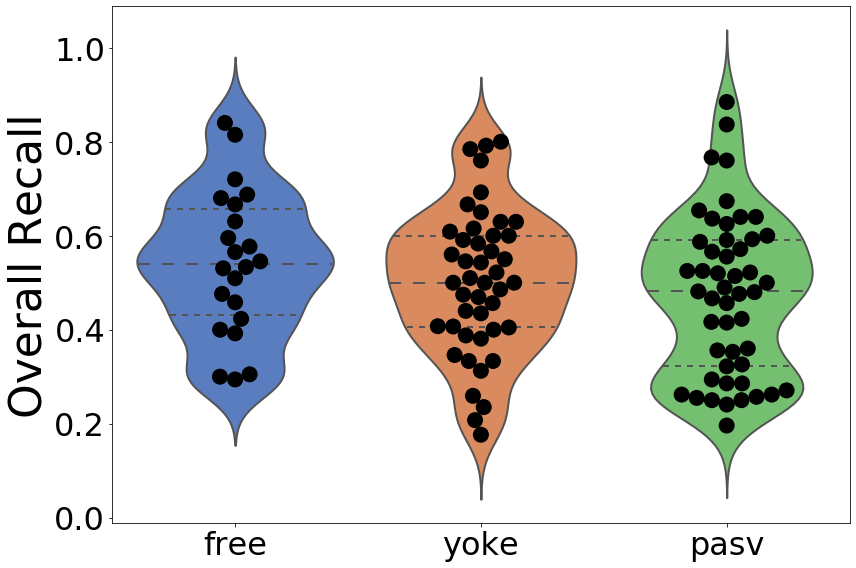

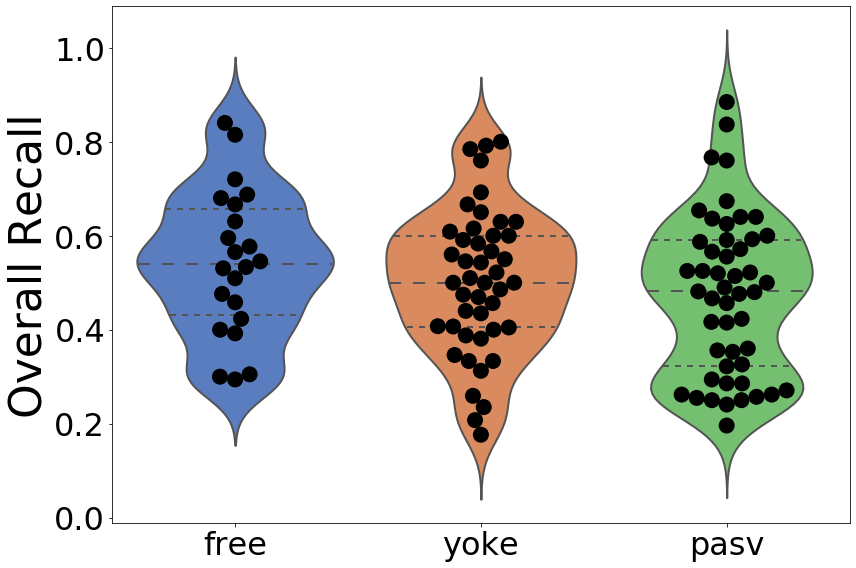

In [ ]:
#1. adventure: overall recall comparison across 3 conditions

# Load the Excel file
file_path = './3_violin_plots/compare_conds.xlsx'
sheet_name = 'adv_allconds-match'
# Read the specified sheet into a dataframe
df = pd.read_excel(file_path, sheet_name=sheet_name)
# Rename the column 'overall_rcl' to 'Overall Recall'
df.rename(columns={'overall_rcl': 'recall'}, inplace=True)

#violin plot
outdir= './3_violin_plots/'
fm_list = ['.png','.svg']
for fm in fm_list:
    plot_figsize(12,8)
    plot_violin(df,y='recall',x='cond',linewidth=2,bandwidth=.3,inner='quartile',add=True)
    plot_swarm(df,y='recall',x='cond',ytitle='Overall Recall',size=16,outpath=outdir+'violin_adv_recall',fig_format=fm)
    

figure saved.
figure saved.


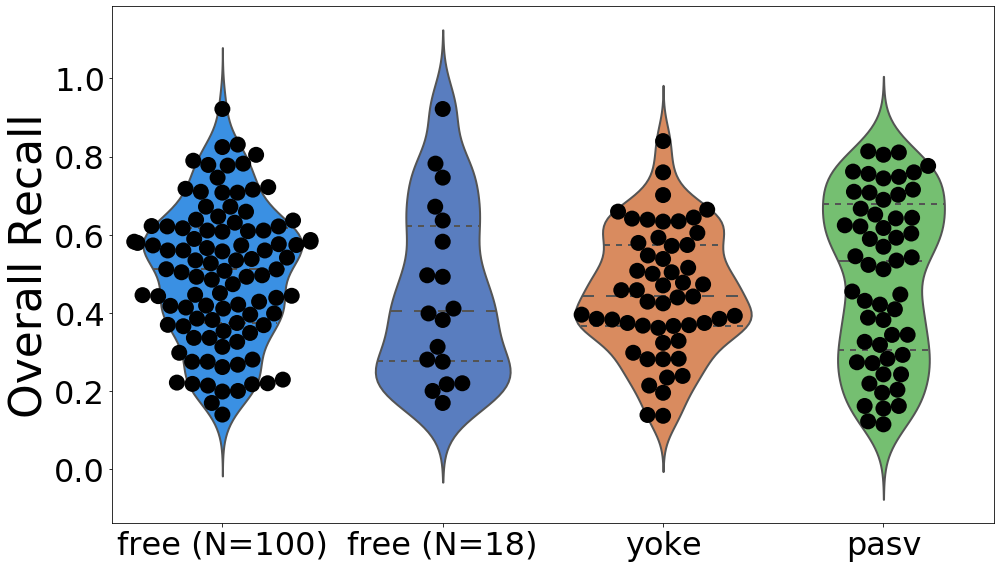

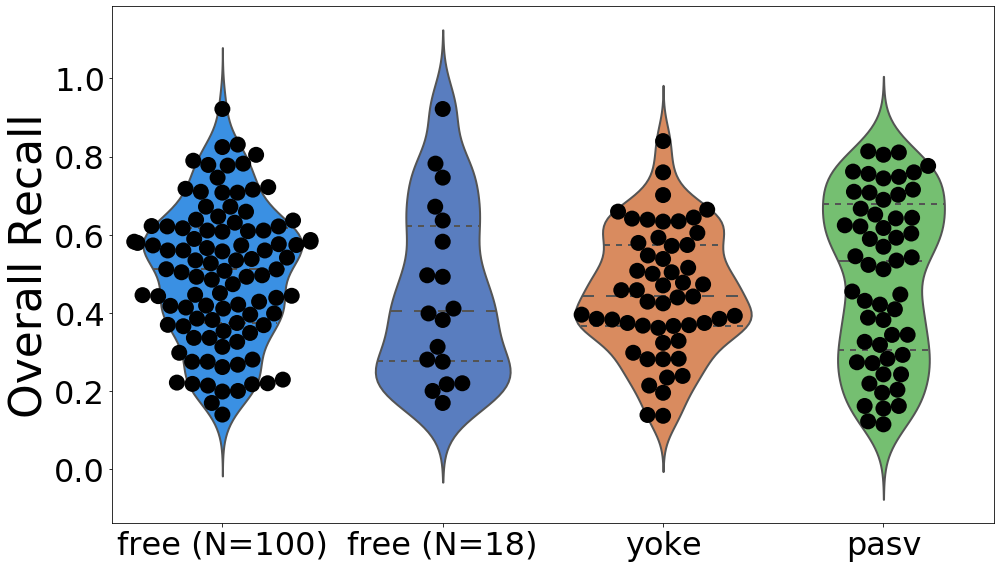

In [ ]:
#2. romance: overall recall comparison across 3 conditions

# Load the excel file
file_path = './3_violin_plots/compare_conds.xlsx'
excel_data = pd.ExcelFile(file_path)
# Read in the data from the second and third sheets
df_sheet2 = pd.read_excel(excel_data, sheet_name=excel_data.sheet_names[1])
df_sheet3 = pd.read_excel(excel_data, sheet_name=excel_data.sheet_names[2])
# Update 'cond' column in sheet2 to 'free (N=18)'; Update 'cond' column in sheet3 to 'free (N=100)'
df_sheet2['cond'] = df_sheet2['cond'].replace('free', 'free (N=18)')
df_sheet3['cond'] = df_sheet3['cond'].replace('free', 'free (N=100)')
# Convert the updated DataFrames to dictionaries
data_sheet2_updated = {}
data_sheet3_updated = {}
for col in df_sheet2.columns:
    if pd.api.types.is_numeric_dtype(df_sheet2[col]):
        data_sheet2_updated[col] = df_sheet2[col].astype(float).tolist()
    else:
        data_sheet2_updated[col] = df_sheet2[col].astype(str).tolist()

for col in df_sheet3.columns:
    if pd.api.types.is_numeric_dtype(df_sheet3[col]):
        data_sheet3_updated[col] = df_sheet3[col].astype(float).tolist()
    else:
        data_sheet3_updated[col] = df_sheet3[col].astype(str).tolist()
# Concatenate the two data dictionaries
data_total = {key: data_sheet2_updated.get(key, []) + data_sheet3_updated.get(key, []) for key in set(data_sheet2_updated) | set(data_sheet3_updated)}
# Convert the concatenated data dictionary to a DataFrame for easy viewing
df_data_total = pd.DataFrame(data_total)
# Define the desired order of the 'cond' values
desired_order = ['free (N=100)', 'free (N=18)', 'yoke', 'pasv']
# Convert 'cond' column to a categorical type with the desired order
df_data_total['cond'] = pd.Categorical(df_data_total['cond'], categories=desired_order, ordered=True)
df_data_total['recall'] = df_data_total['overall_rcl']
# Sort the DataFrame by the 'cond' column
df = df_data_total.sort_values(by='cond')
df.reset_index(drop=True, inplace=True)

#violin plot
outdir= './3_violin_plots/'
fm_list = ['.png','.svg']
for fm in fm_list:
    plot_figsize(14,8)
    plot_violin(df,y='recall',x='cond',linewidth=2,bandwidth=.3,inner='quartile',palet=['dodgerblue','#4878d0','#ee854a','#6acc64'],add=True)
    plot_swarm(df,y='recall',x='cond',ytitle='Overall Recall',size=16,outpath=outdir+'violin_rom_recall',fig_format=fm)


figure saved.
figure saved.
figure saved.
figure saved.


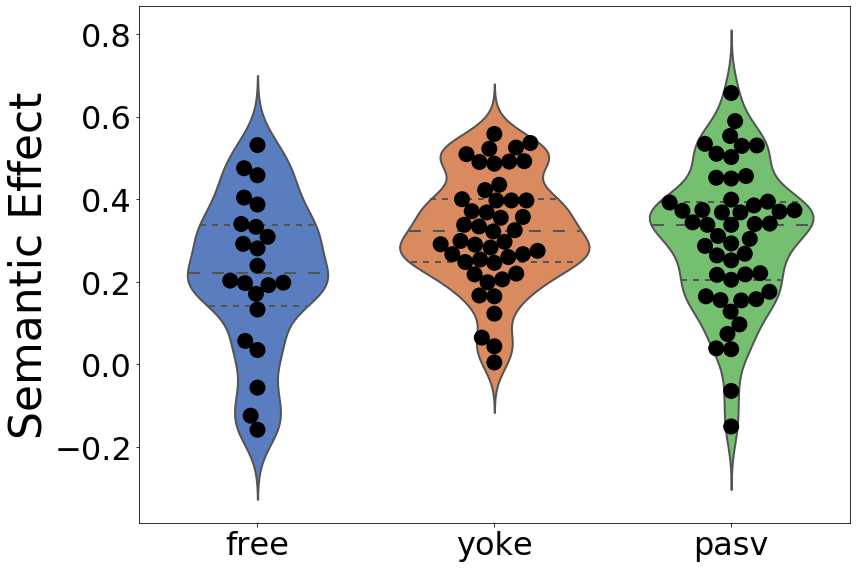

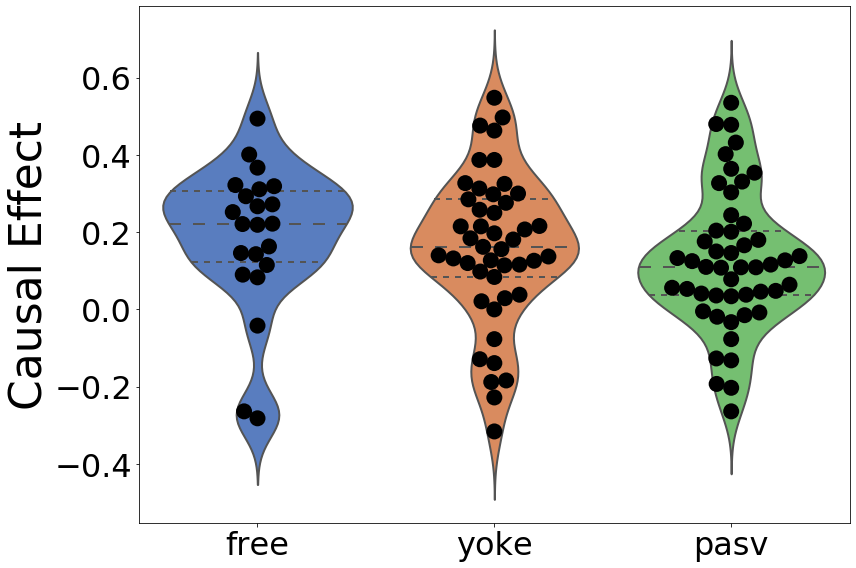

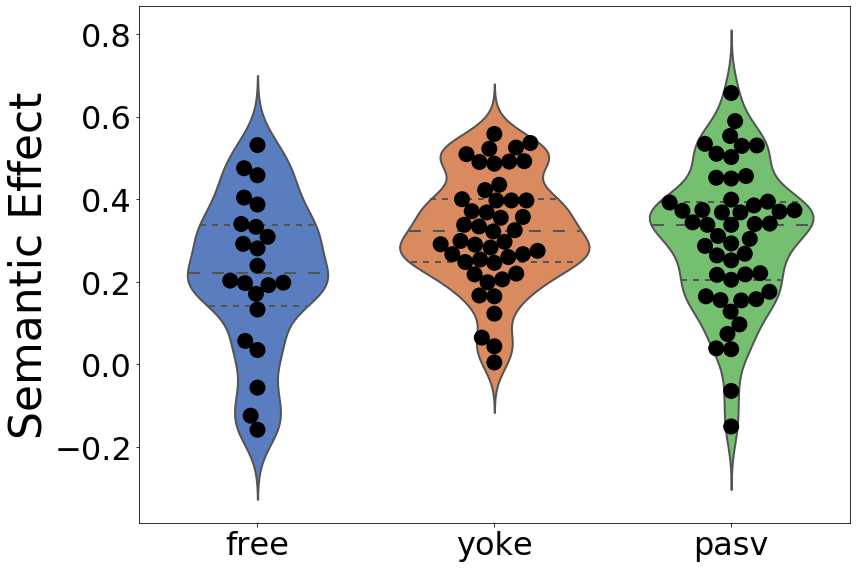

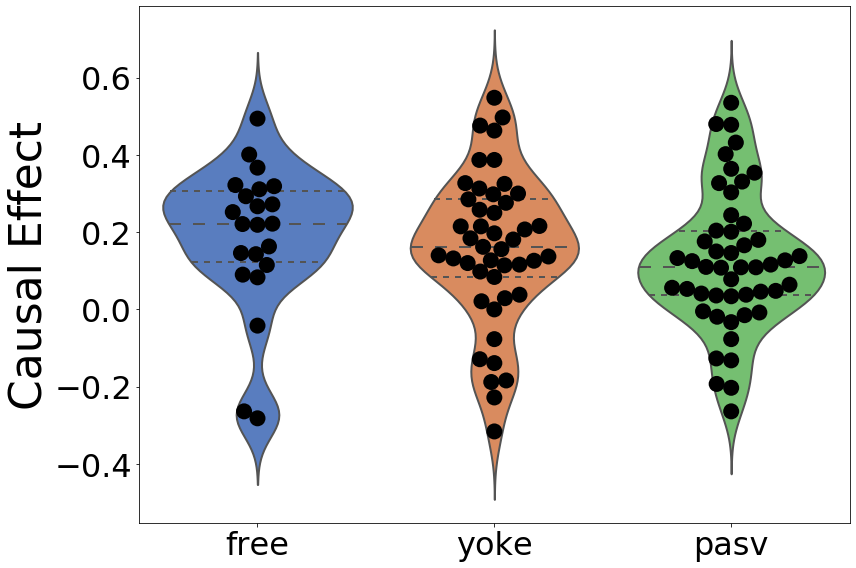

In [ ]:
# 3. adventure: semantic/causal centrality effect on memory comparison across 3 conditions

# Load the Excel file
file_path = './3_violin_plots/compare_conds.xlsx'
sheet_name = 'adv_allconds-match'
# Read the specified sheet into a dataframe
df = pd.read_excel(file_path, sheet_name=sheet_name)

#violin plot
outdir= './3_violin_plots/'
fm_list = ['.png','.svg']
ef_list = ['sem-ef','caus-ef']
ef_name = ['Semantic Effect', 'Causal Effect']
for fm in fm_list:
    cnt = 0
    for ef in ef_list:
        plot_figsize(12,8)
        plot_violin(df,y=ef,x='cond',linewidth=2,bandwidth=.3,inner='quartile',add=True)
        plot_swarm(df,y=ef,x='cond',ytitle=ef_name[cnt],size=16,outpath=outdir+'violin_adv_'+ef,fig_format=fm)
        cnt+=1
        

figure saved.
figure saved.
figure saved.
figure saved.


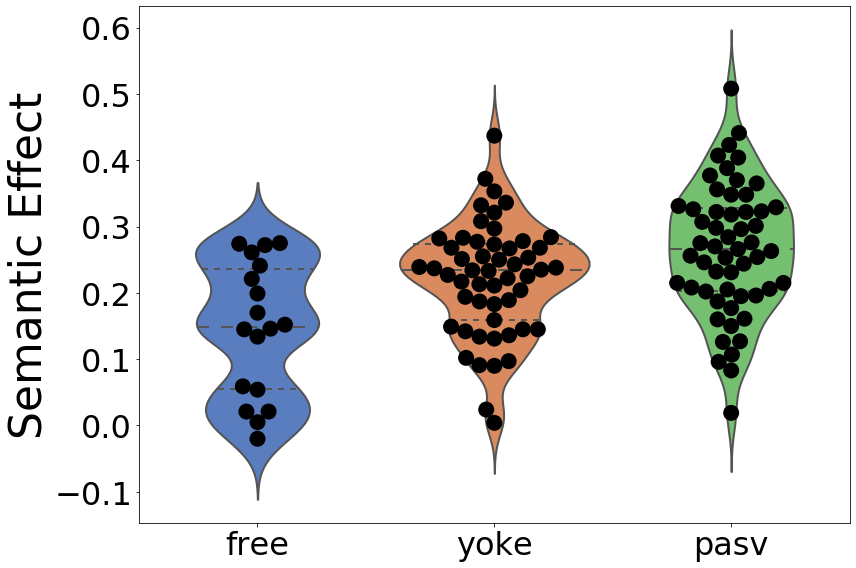

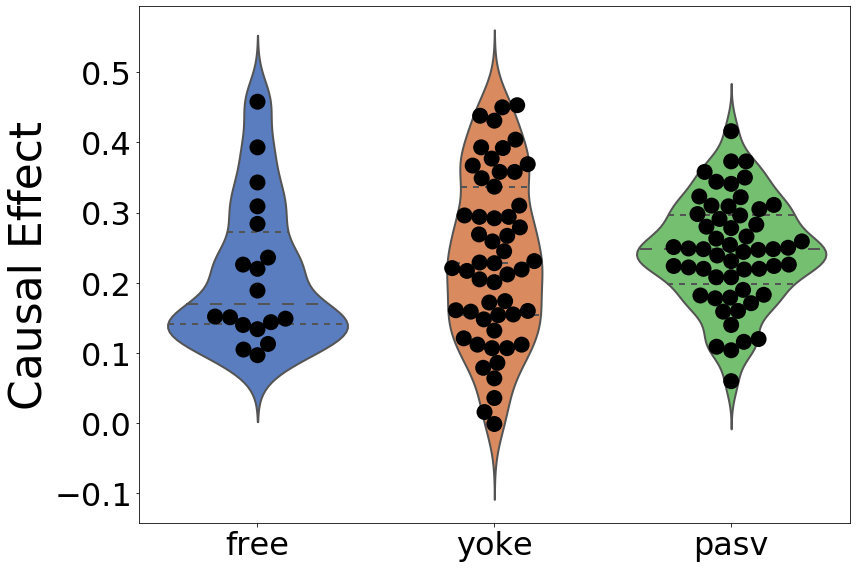

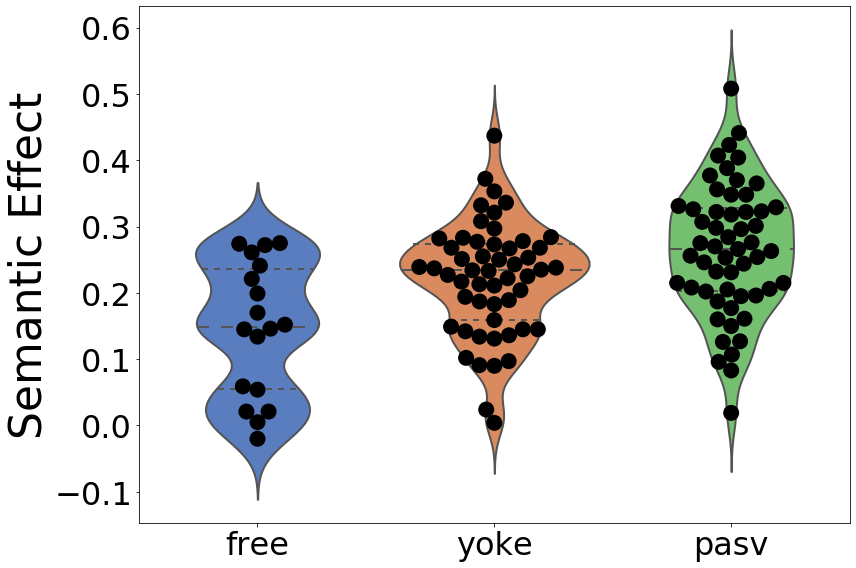

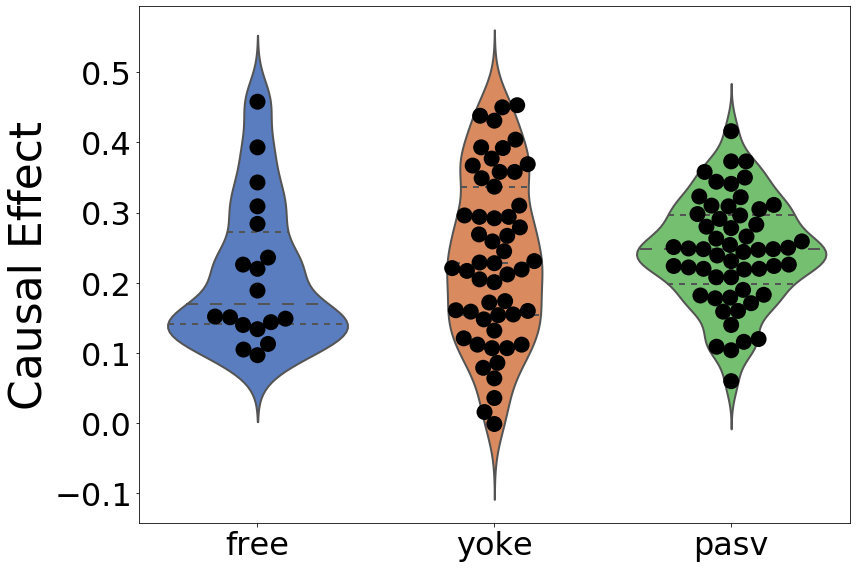

In [ ]:
# 4. romance: semantic/causal centrality effect on memory comparison across 3 conditions

# Load the excel file
file_path = './3_violin_plots/compare_conds.xlsx'
excel_data = pd.ExcelFile(file_path)
# Read in the data from the second and third sheets
df = pd.read_excel(excel_data, sheet_name=excel_data.sheet_names[1])
# Reorder the conditions
desired_order = ['free', 'yoke', 'pasv']
# Convert 'cond' column to a categorical type with the desired order
df['cond'] = pd.Categorical(df['cond'], categories=desired_order, ordered=True)
df['recall'] = df['overall_rcl']
# Sort the DataFrame by the 'cond' column
df = df.sort_values(by='cond')
df.reset_index(drop=True, inplace=True)

#violin plot
outdir= './3_violin_plots/'
fm_list = ['.png','.svg']
ef_list = ['sem-ef','caus-ef']
ef_name = ['Semantic Effect', 'Causal Effect']
for fm in fm_list:
    cnt = 0
    for ef in ef_list:
        plot_figsize(12,8)
        plot_violin(df,y=ef,x='cond',linewidth=2,bandwidth=.3,inner='quartile',add=True)
        plot_swarm(df,y=ef,x='cond',ytitle=ef_name[cnt],size=16,outpath=outdir+'violin_rom_'+ef,fig_format=fm)
        cnt+=1

/Users/xli239/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


figure saved.
figure saved.


/Users/xli239/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


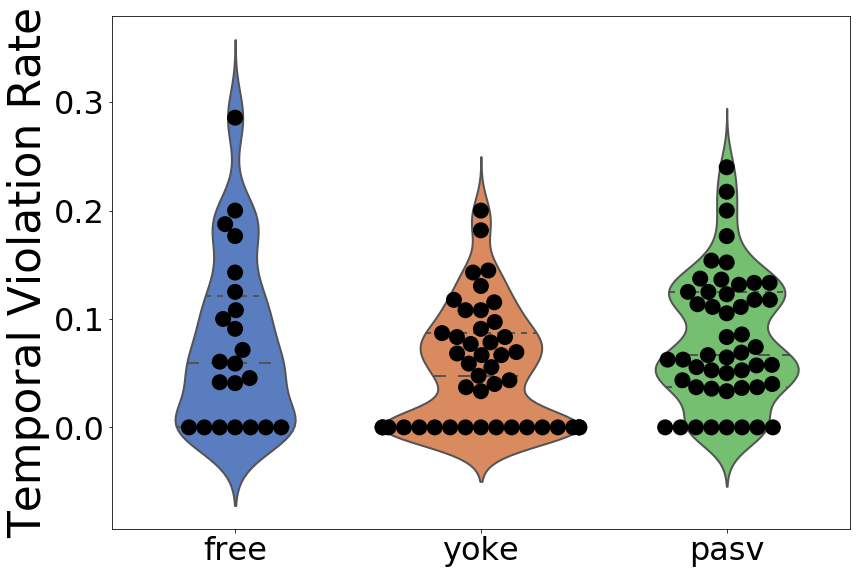

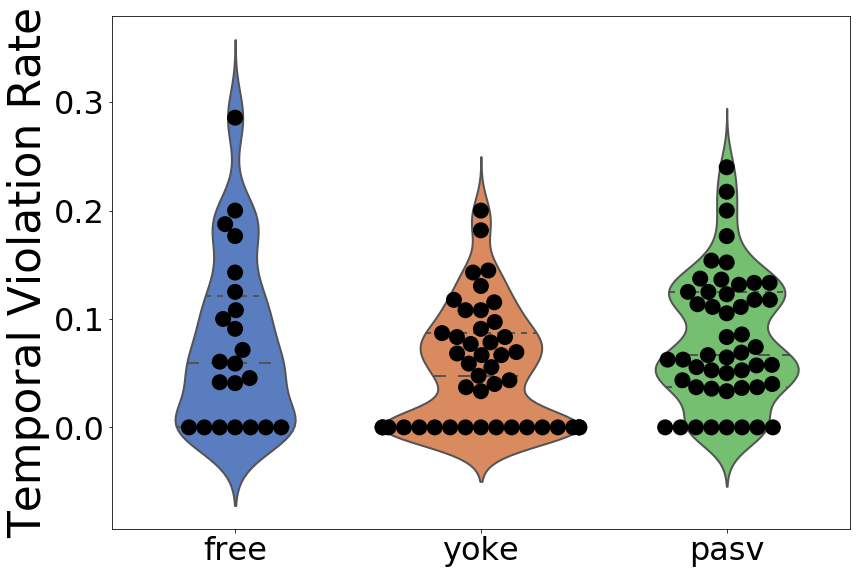

In [ ]:
# 5. adventure: temporal violation rate comparison across 3 conditions

# Load the Excel file
file_path = './3_violin_plots/compare_conds.xlsx'
sheet_name = 'adv_allconds-match'
# Read the specified sheet into a dataframe
df = pd.read_excel(file_path, sheet_name=sheet_name)
# Rename the column 'overall_rcl' to 'Overall Recall'
df.rename(columns={'overall_rcl': 'recall'}, inplace=True)

#violin plot
outdir= './3_violin_plots/'
fm_list = ['.png','.svg']
ef_list = ['tv_rate']
for fm in fm_list:
    for ef in ef_list:
        plot_figsize(12,8)
        plot_violin(df,y=ef,x='cond',linewidth=2,bandwidth=.3,inner='quartile',add=True)
        plot_swarm(df,y=ef,x='cond',ytitle='Temporal Violation Rate',size=16,outpath=outdir+'violin_adv_'+ef,fig_format=fm)
        

figure saved.
figure saved.


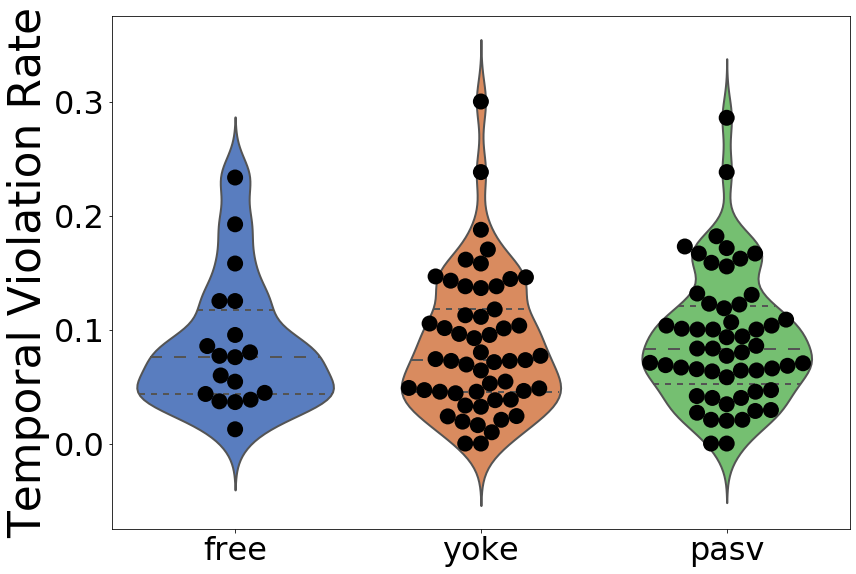

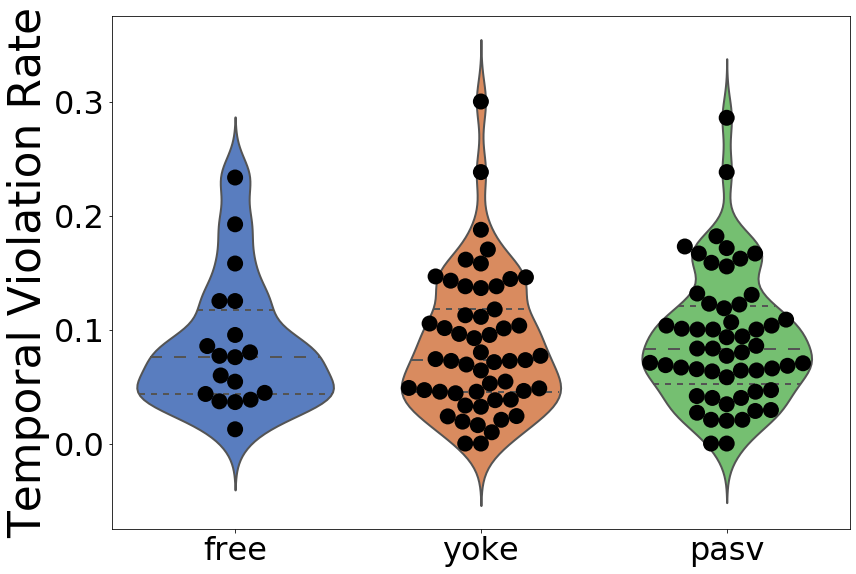

In [ ]:
# 6. romance: temporal violation rate comparison across 3 conditions

# Load the excel file
file_path = './3_violin_plots/compare_conds.xlsx'
excel_data = pd.ExcelFile(file_path)
# Read in the data from the second and third sheets
df = pd.read_excel(excel_data, sheet_name=excel_data.sheet_names[1])
# Reorder the conditions
desired_order = ['free', 'yoke', 'pasv']
# Convert 'cond' column to a categorical type with the desired order
df['cond'] = pd.Categorical(df['cond'], categories=desired_order, ordered=True)
df['recall'] = df['overall_rcl']
# Sort the DataFrame by the 'cond' column
df = df.sort_values(by='cond')
df.reset_index(drop=True, inplace=True)

#violin plot
outdir= './3_violin_plots/'
fm_list = ['.png','.svg']
ef_list = ['tv_rate']
for fm in fm_list:
    for ef in ef_list:
        plot_figsize(12,8)
        plot_violin(df,y=ef,x='cond',linewidth=2,bandwidth=.3,inner='quartile',add=True)
        plot_swarm(df,y=ef,x='cond',ytitle='Temporal Violation Rate',size=16,outpath=outdir+'violin_rom_'+ef,fig_format=fm)
        